In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [7]:
print(df.duplicated().any())

True


In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(302, 14)

boxplot for  age


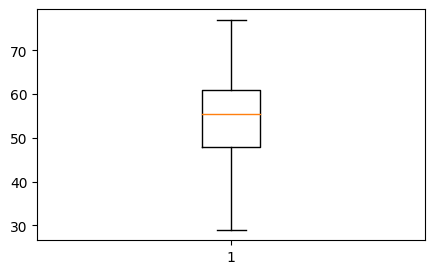

boxplot for  sex


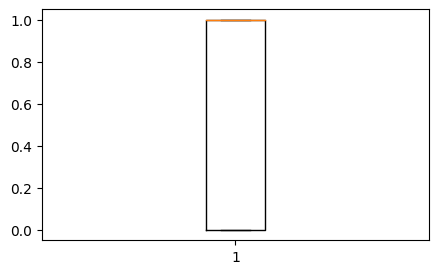

boxplot for  cp


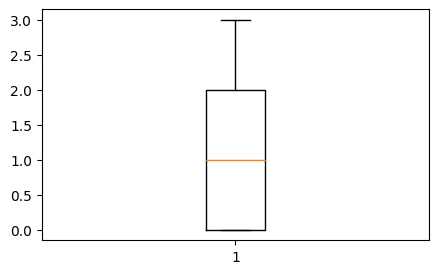

boxplot for  trestbps


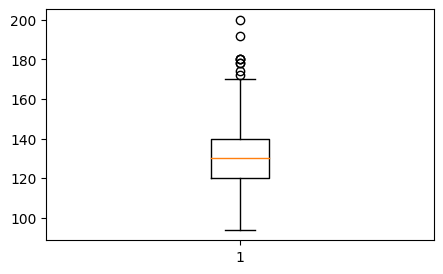

boxplot for  chol


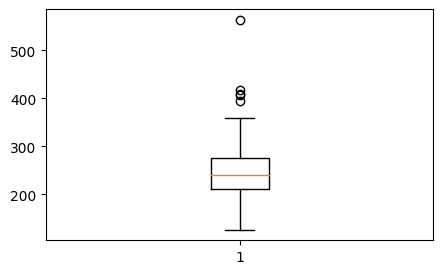

boxplot for  fbs


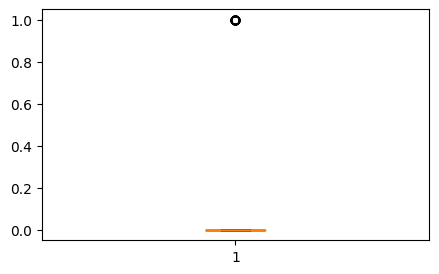

boxplot for  restecg


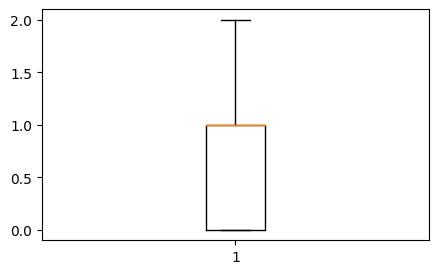

boxplot for  thalach


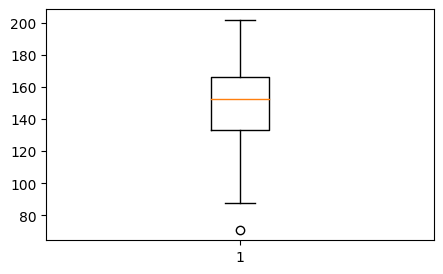

boxplot for  exang


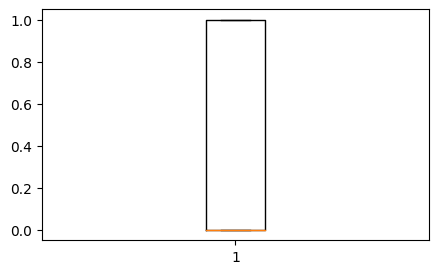

boxplot for  oldpeak


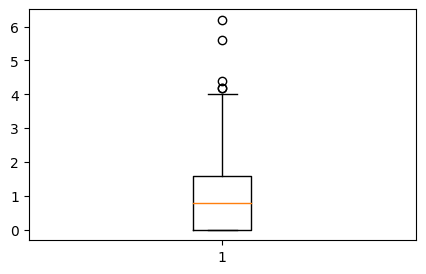

boxplot for  slope


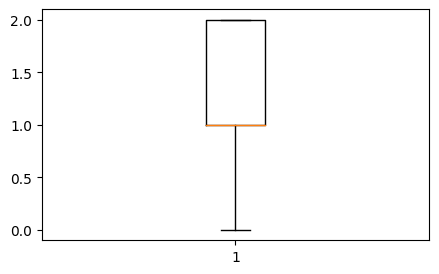

boxplot for  ca


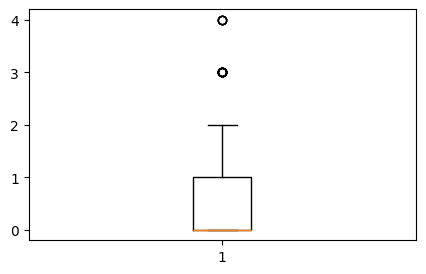

boxplot for  thal


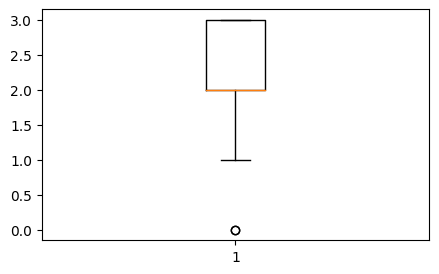

boxplot for  target


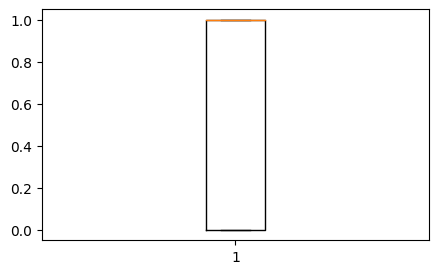

In [10]:
for column in df.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(data=df,x=column)
    print("boxplot for ",column)
    plt.show()

In [11]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='chol'>

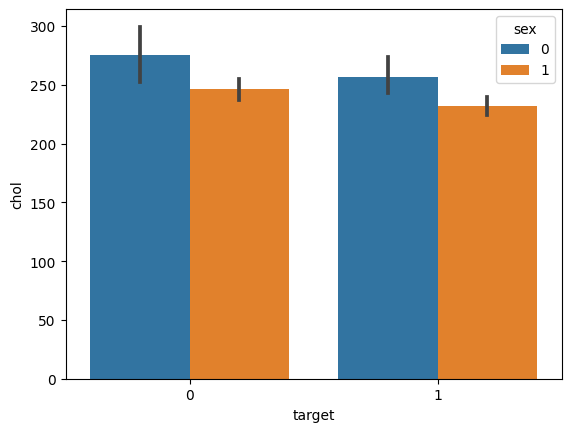

In [12]:
sns.barplot(data=df , x=df['target'], y=df['chol'],hue="sex")
# plt.title("Boxplot of Chol by Target")
# plt.ylabel("Chol Values")
# plt.xlabel("Target")
# plt.show()

<Axes: xlabel='target', ylabel='chol'>

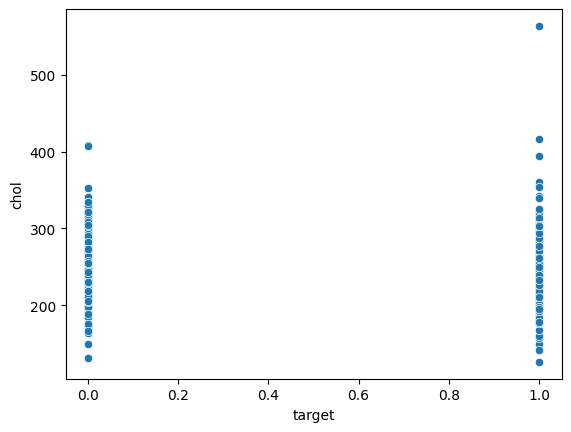

In [13]:
sns.scatterplot(data=df , x=df['target'], y=df['chol'])

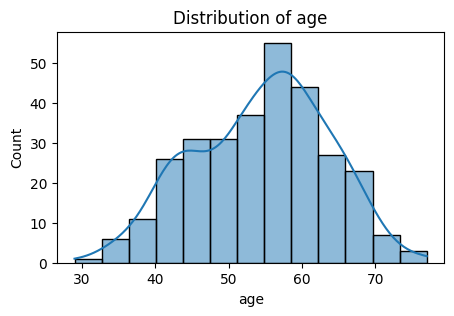

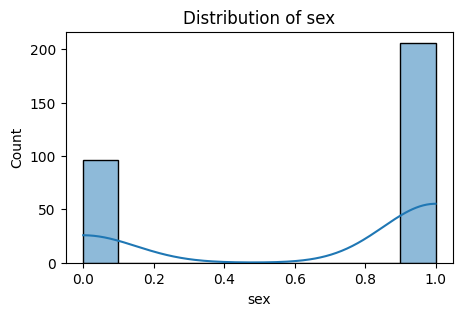

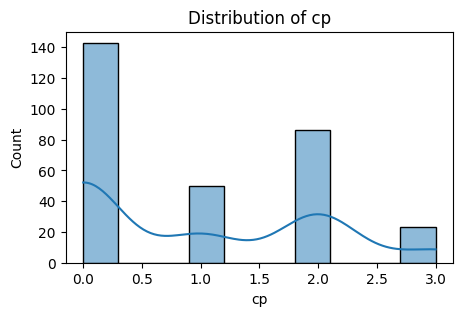

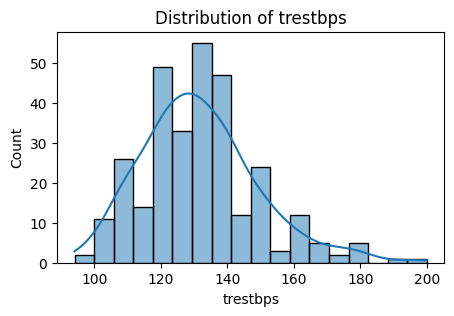

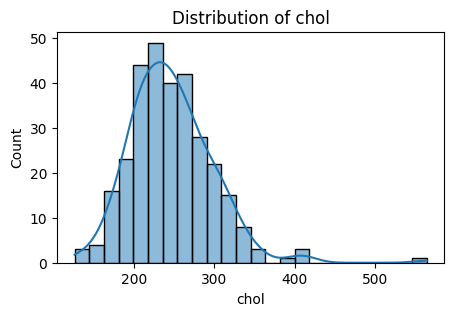

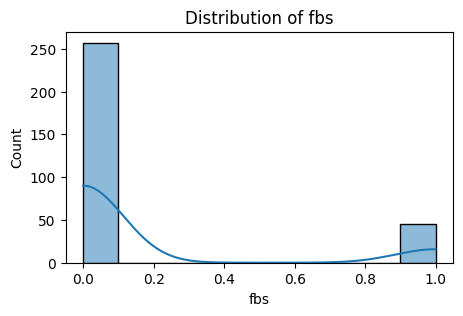

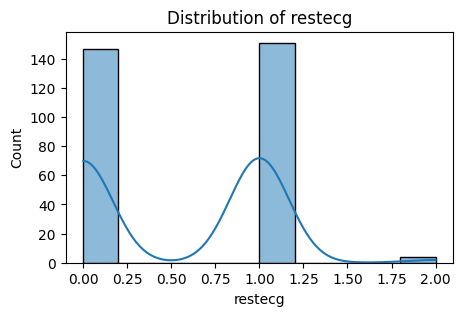

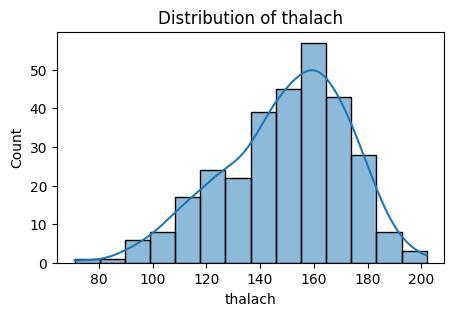

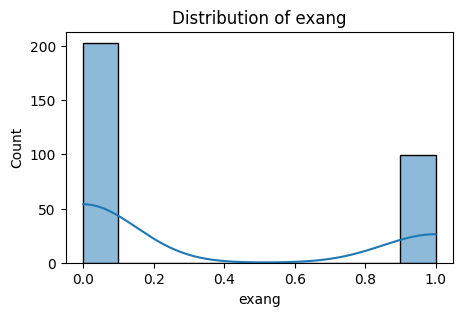

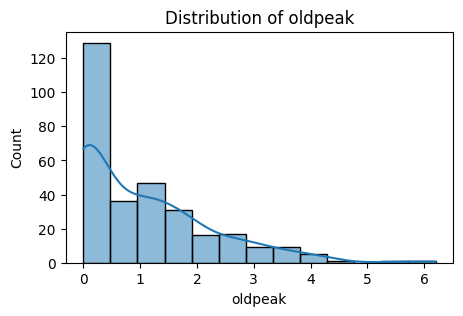

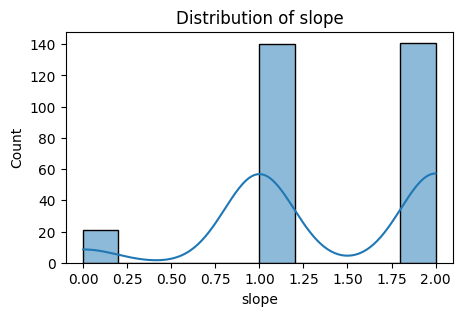

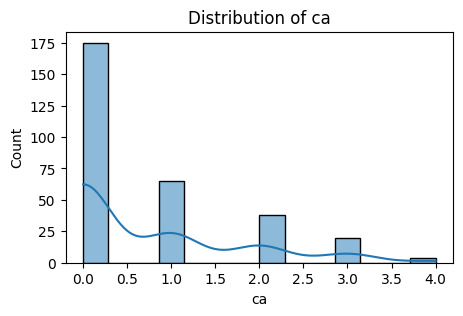

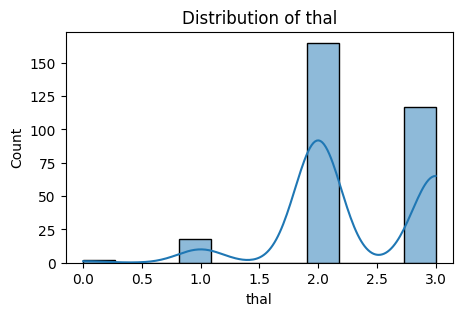

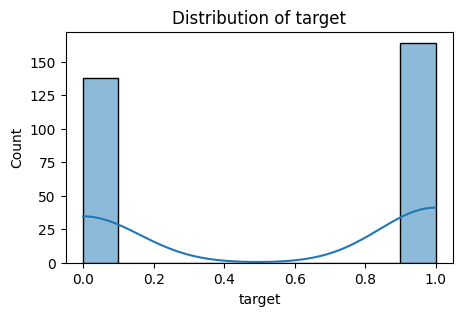

In [14]:
# numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

In [15]:
temp = df.drop(columns='target')

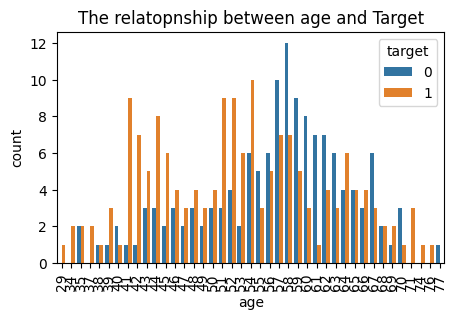

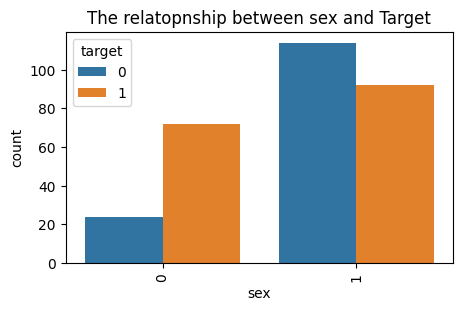

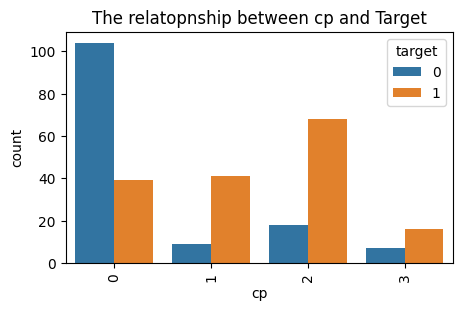

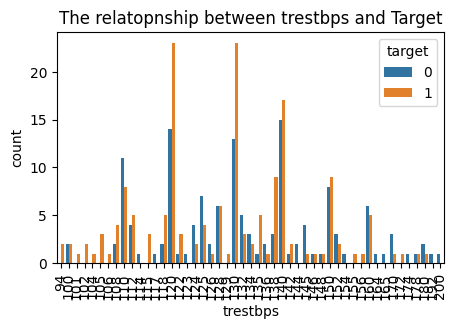

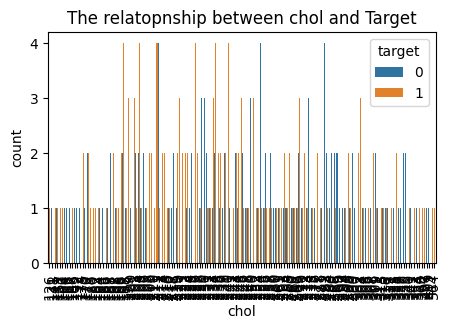

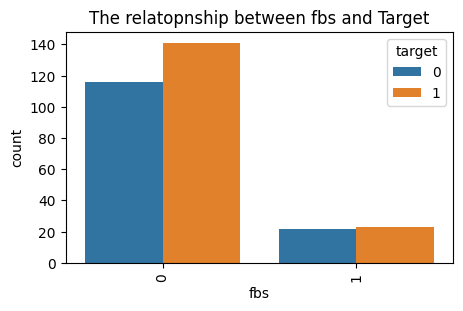

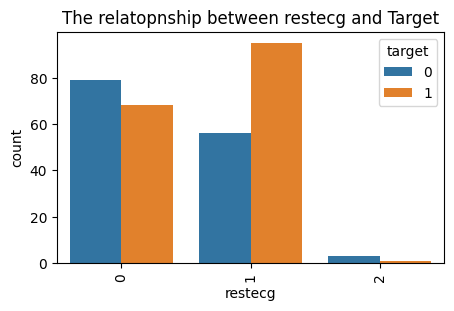

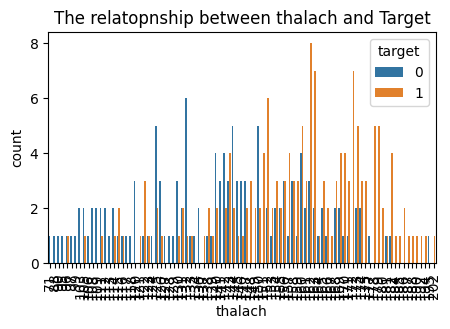

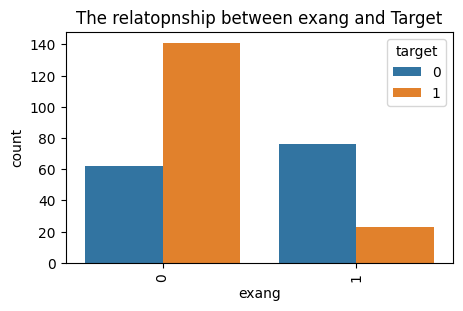

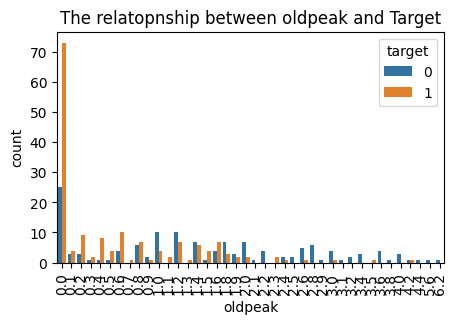

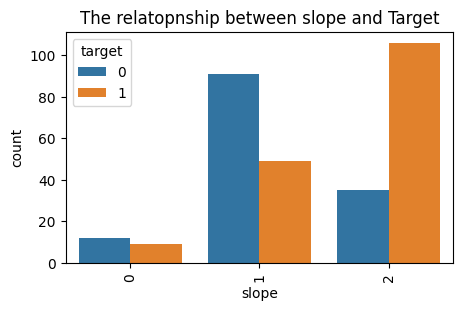

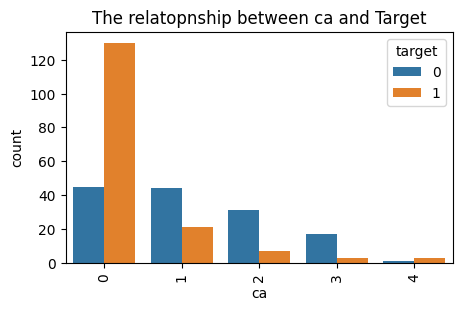

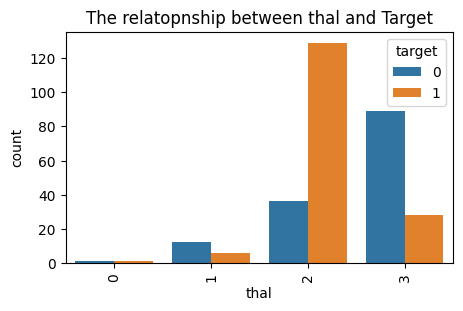

In [16]:
for val in temp:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df,x=val,hue=df['target'])
    plt.title("The relatopnship between " + val + " and Target")
    plt.xticks(rotation=90)
    plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
X=df.drop(columns='target',axis=1)
Y=df.iloc[:,-1].values
print(Y)

[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1
 0 1 1 0 0 0]


In [23]:
colList = X.columns.tolist()
print(colList)
for i,column in enumerate(X.columns):
    print(f"{colList[i]}: Max: {X[column].max()}, Min: {X[column].min()}")

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
age: Max: 77, Min: 29
sex: Max: 1, Min: 0
cp: Max: 3, Min: 0
trestbps: Max: 200, Min: 94
chol: Max: 564, Min: 126
fbs: Max: 1, Min: 0
restecg: Max: 2, Min: 0
thalach: Max: 202, Min: 71
exang: Max: 1, Min: 0
oldpeak: Max: 6.2, Min: 0.0
slope: Max: 2, Min: 0
ca: Max: 4, Min: 0
thal: Max: 3, Min: 0


In [24]:
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### LogisticRegression

In [26]:
inear = LogisticRegression(random_state=0)
inear.fit(X_train,y_train)
print(X.shape, X_train, X_test.shape)
# pred = accuracy_score(y_pred,y_test)
# print("The accuracy score for LR is " ,pred)

(302, 13) [[0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 [0.41666667 0.         0.33333333 ... 0.5        0.         0.66666667]
 [0.58333333 1.         0.66666667 ... 0.5        0.25       1.        ]
 ...
 [0.10416667 1.         1.         ... 1.         0.         0.66666667]
 [0.60416667 0.         1.         ... 1.         0.         0.66666667]
 [0.64583333 1.         0.         ... 0.5        0.25       1.        ]] (76, 13)


In [27]:
y_pred = inear.predict(X_test)
print("The accuracy Score for LogisticRegression :", accuracy_score(y_pred,y_test))

The accuracy Score for LogisticRegression : 0.8026315789473685


### SVC

In [28]:
classifier = SVC()
grid={
    'kernel':['sigmoid','rbf','poly']
}
model = GridSearchCV(classifier,grid)
model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['sigmoid', 'rbf', 'poly']})

In [29]:
print("Best Parameters:", model.best_params_)
print("Best Score:", model.best_score_)

Best Parameters: {'kernel': 'rbf'}
Best Score: 0.8409661835748793


In [30]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("The accuracy Score for SVC :",accuracy_score(y_pred,y_test))

The accuracy Score for SVC : 0.8157894736842105


### Tree

In [31]:
classifier = DecisionTreeClassifier()
grid={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[2,3,4,5,6]
}
model = GridSearchCV(classifier,grid)
model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6]})

In [32]:
print("The Best Parameter :",model.best_params_)
print("The Best score :",model.best_score_)

The Best Parameter : {'criterion': 'entropy', 'max_depth': 3}
The Best score : 0.801256038647343


In [33]:
classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("The accuracy Score for DEcisionTreeClassifier :",accuracy_score(y_pred,y_test))

The accuracy Score for DEcisionTreeClassifier : 0.7105263157894737


### RandomForestclassifier

In [34]:
classifier = RandomForestClassifier(n_estimators=110,criterion='log_loss')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("The accuracy Score for DEcisionTreeClassifier :",accuracy_score(y_pred,y_test))

The accuracy Score for DEcisionTreeClassifier : 0.7368421052631579


### KNN

In [80]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("The accuracy Score for DEcisionTreeClassifier :",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

The accuracy Score for DEcisionTreeClassifier : 0.8157894736842105
[[27  7]
 [ 7 35]]


### The best model is KNN ans SVM

In [68]:
# Define the model with default hyperparameters
model = GradientBoostingClassifier(learning_rate=0.44,n_estimators=120)
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
print("The accuracy Score for GradientBoostingClassifier :",accuracy_score(y_pred,y_test))

The accuracy Score for GradientBoostingClassifier : 0.7631578947368421


In [73]:
# pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01,0.02,0.03,0.04, 0.1, 0.2],
    'max_depth': [3, 4, 5,6,7],
    'n_estimators': [100,105,110,120,130,200],
    'subsample': [0.8,0.9, 1.0],
    'colsample_bytree': [0.8,0.9, 1.0],
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=0)

# Initialize GridSearchCV with the XGBoost model and parameter grid
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

In [75]:
print(confusion_matrix(y_pred,y_test))

[[21  6]
 [13 36]]
